* Authors: Andrea Jiménez Zuñiga e Isabel Afán de Ribera
* Date: 04/12/2020
* Institution: CUNEF

# 03. BASELINE AND REGRESSION MODEL

## BASELINE MODEL

To validate our model is necessary to split the data set in a training and test set. 
To do this, the data is randomly divided by applying 80% of the observations to training and the remaining 20% to test. 



In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn import metrics
from sklearn.linear_model import LogisticRegression # Log Regression
from sklearn.model_selection import train_test_split # split data
from sklearn.dummy import DummyClassifier
import itertools # aplanar arrays
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report


* __Reading the Data File__ 

In [3]:
data_path = '../data/Engineering_loans_final_3.csv'
loans = pd.read_csv(data_path)
loans

,term,loan_amnt,installment,int_rate,annual_inc,emp_length,revol_util,revol_bal,pub_rec,open_acc,...,delinq_2yrs,dti,tax_liens,pub_rec_bankruptcies,loan_status,home_ownership,purpose,grade,sub_grade,verification_status
0,-0.598017,-0.358869,-0.324389,-1.326914,1.171580,-0.024876,-1.280531,-0.348224,1.201397,1.496916,...,-0.373774,-0.165271,-0.136688,2.147209,1.0,2.0,1.0,0.0,3.0,0.0
1,-0.598017,-0.871890,-0.614953,2.544662,-0.387948,-1.181062,1.913435,-0.572315,-0.377537,-1.427104,...,-0.373774,-1.402368,-0.136688,-0.371165,1.0,3.0,2.0,4.0,22.0,1.0
2,-0.598017,-0.836712,-0.823949,-1.326914,0.520515,0.264170,-1.091911,0.316323,-0.377537,1.314164,...,-0.373774,-0.603693,-0.136688,-0.371165,1.0,1.0,2.0,0.0,3.0,0.0
3,1.672193,-0.543557,-0.782474,0.591176,-0.357984,0.264170,-1.393703,-0.474730,2.780331,0.583159,...,-0.373774,-0.944687,-0.136688,4.665582,1.0,3.0,2.0,2.0,14.0,1.0
4,-0.598017,-0.074509,0.201280,0.591176,-0.009422,0.264170,1.540387,-0.610936,-0.377537,-1.427104,...,0.716149,-0.859722,-0.136688,-0.371165,1.0,1.0,2.0,2.0,14.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462186,-0.598017,-0.358869,-0.145256,0.496045,-0.760418,1.131309,0.492498,0.088101,-0.377537,-0.513348,...,-0.373774,0.977797,-0.136688,-0.371165,1.0,3.0,1.0,3.0,15.0,2.0
462187,-0.598017,-0.309033,-0.169311,-0.300393,-0.191114,-1.470109,0.689501,0.215820,-0.377537,0.217657,...,0.716149,0.593754,-0.136688,-0.371165,0.0,1.0,1.0,1.0,9.0,2.0
462188,1.672193,-0.191771,-0.494991,0.584539,-0.615064,-0.313923,0.337410,-0.236808,1.201397,-0.513348,...,-0.373774,1.410555,-0.136688,2.147209,0.0,3.0,2.0,3.0,16.0,2.0
462189,1.672193,-0.309033,-0.487920,1.469470,-0.169917,-1.470109,-0.949398,-0.361517,-0.377537,0.948662,...,0.716149,0.990259,-0.136688,-0.371165,0.0,3.0,2.0,4.0,22.0,1.0


* __Splitting the data into train and test set__

First we define features and the target variable. Once we have defined it, we split the data.

In [4]:
X = loans.drop('loan_status', axis = 1)
y = loans['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12345)

* __Fitting the model and Prediction__

In [5]:
#MODELO BASELINE

modelo_b = DummyClassifier(strategy = 'most_frequent', random_state = 12345)

In [6]:
modelo_b.fit(X_train, y_train)

DummyClassifier(random_state=12345, strategy='most_frequent')

* __Accuracy__

In [7]:
modelo_b.score(X_test, y_test)

0.7464706455067667

In this case we can see that the accuracy is 74%.

* __Saving the model__

In [8]:
# Saving the model 

model = modelo_b
filename = 'modelo_base.pkl'
pickle.dump(model,open(filename,'wb'))

## Logistic Regression

To validate our model is necessary to split the data set in a training and test set. To do this, the data is randomly divided by applying 80% of the observations to training and the remaining 20% to test.

In [9]:
# Endogena

endogena = ['loan_status'] 

# Exógenas

exogenas = list(set(list(loans.columns))-set(endogena))

X = loans[exogenas].values
Y = loans[endogena].values

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=12345)

sm = SMOTE(random_state=12345)
X_train, Y_train = sm.fit_sample(X_train, Y_train)
print(X_train.shape); print(X_test.shape); print(Y_test.shape)

(553034, 20)
(92439, 20)
(92439, 1)


In [12]:
%%time
model_regression = LogisticRegression(random_state=12345, solver="saga", penalty="l1", class_weight="balanced", C=1.0, max_iter=500)
model_regression.fit(X_train, Y_train)
reg_probs = model_regression.predict_proba(X_train)
logit_scores = reg_probs[:,1]

CPU times: user 1min 58s, sys: 829 ms, total: 1min 59s
Wall time: 2min 2s


* __Fitting the model and Prediction__

We make the predictions using the subset above, which is the test set.

In [13]:
y_pred=model_regression.predict(X_test)

## Model Evaluation

* __Confussion Matrix__

In order to be able to illustrate the confusion matrix, a function called plot_confusion_matrix has been defined, indicating the parameters to be taken into account.

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


We proceed to graph the confussion matrix:

Confusion matrix, without normalization
[[14732  8704]
 [22103 46900]]


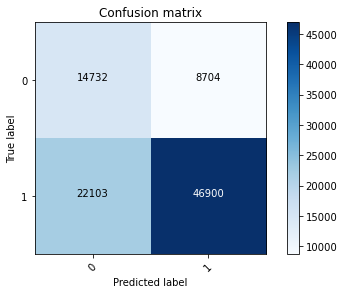

In [17]:
cnf_matrix = confusion_matrix(Y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [18]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  14732
False Positives:  8704
False Negatives:  22103
True Positives:  46900


With the confusion matrix we can see that there are 46.900 true positives in total, which means that those loans that have been classified as fully paid are correctly placed.

On the other hand, we can see that there are 14.732 true negatives in total, which means that those loans that have been classified as not paid are correctly placed.

It can be seen as well, that there is a total of 8.704 and 22.103 false positives and false negatives, respectively. This means that these loans have been misplaced.

* __Normalized Confussion Matrix__

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.62860556 0.37139444]
 [0.32031941 0.67968059]]


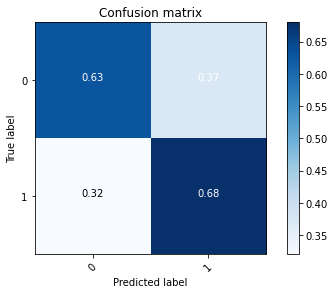

In [20]:
cnf_matrix = confusion_matrix(Y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [21]:
model_regression.score(X_test, Y_test)

0.6667315743355078

* __Precision, Accuracy, Recall, F1-score and Support__

In [22]:
print('Logistic Regression')
print(classification_report(Y_test,y_pred))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(model_regression.score(X_test, Y_test)))
print('')

Logistic Regression
              precision    recall  f1-score   support

         0.0       0.40      0.63      0.49     23436
         1.0       0.84      0.68      0.75     69003

    accuracy                           0.67     92439
   macro avg       0.62      0.65      0.62     92439
weighted avg       0.73      0.67      0.69     92439

Accuracy of Logistic Regression classifier on test set: 0.67



In this case we can see that the accuracy is 67%.

* __ROC Curve__

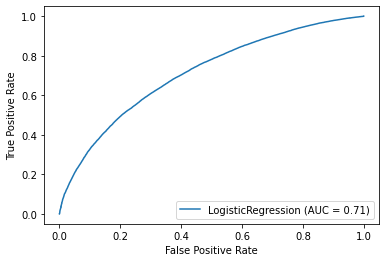

Logistic Regression score train:  0.6564623513201719
Logistic Regression score:  0.6667315743355078


In [23]:
metrics.plot_roc_curve(model_regression, X_test, Y_test)
plt.show()                     
print("Logistic Regression score train: ", model_regression.score(X_train, Y_train))
print("Logistic Regression score: ", model_regression.score(X_test, Y_test))

* **Errors**

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.3332684256644923
Mean Squared Error: 0.3332684256644923
Root Mean Squared Error: 0.5772940547628151


* __Saving the model__ 

In [26]:
model = model_regression
filename = 'modelo_regresion.pkl'
pickle.dump(model,open(filename,'wb'))